Please carefully check the path of the folder I will take here. I will demonstrated the data reading part here.

Download the audio data, mount the drive. Similar process

In [ ]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display
from tqdm import tqdm

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# file directory check
# On cats and dogs dataset, under training folder, you will see there are two folders called cats and dogs. we will take those
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Updated Audio dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
# on the datadirectory also we will give that previously mentioned path
DATADIR = '/content/drive/MyDrive/Colab Notebooks/Updated Audio dataset'
CATEGORIES = ['Explosion','Emergency Signals','Engine running','Take off']

In [ ]:
len(r'/content/drive/MyDrive/Colab Notebooks/Updated Audio dataset/Take off/Just Take off moment sounds(1).wav')

104

In [ ]:
from scipy.io import wavfile
fs, data = wavfile.read('/content/drive/MyDrive/Colab Notebooks/Updated Audio dataset/Take off/Just Take off moment sounds (1).wav')

In [ ]:
data

array([[  155,   373],
       [-1041,  -787],
       [-2329, -2040],
       ...,
       [-1844,  -963],
       [-1929, -1163],
       [-1856, -1197]], dtype=int16)

In [ ]:
len(data)

144000

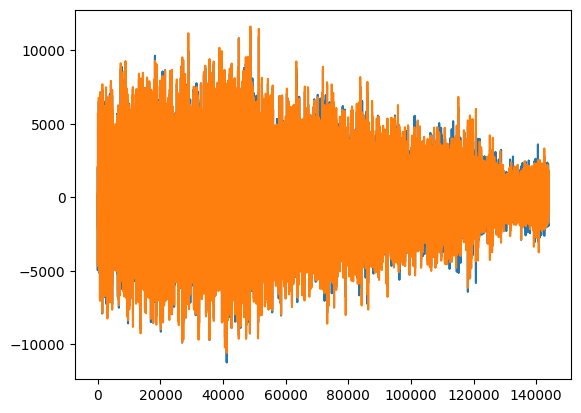

In [ ]:
plt.plot(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dictionary to store results
category_stats = {}

# Loop through each category
for category in CATEGORIES:
    print(f"Processing category: {category}")
    category_path = os.path.join(DATADIR, category)

    # Skip if category folder doesn't exist
    if not os.path.exists(category_path):
        print(f"Warning: Category folder '{category}' not found")
        continue

    # Get all files in the category folder
    files = os.listdir(category_path)

    # Initialize lists to store file lengths
    audio_lengths = []
    file_names = []

    # Loop through each file in the category
    for file in files:
        file_path = os.path.join(category_path, file)

        # Only process audio files (assuming they have these extensions)
        if file.endswith(('.wav', '.mp3', '.ogg', '.flac')):
            try:
                # Load the audio file
                y, sr = librosa.load(file_path, sr=None)

                # Calculate length in samples and seconds
                length_samples = len(y)
                length_seconds = length_samples / sr

                # Store the results
                audio_lengths.append(length_seconds)
                file_names.append(file)

                print(f"  File: {file}, Length: {length_samples} samples ({length_seconds:.2f} seconds)")
            except Exception as e:
                print(f"  Error processing {file}: {str(e)}")

    # Calculate statistics for this category
    if audio_lengths:
        category_stats[category] = {
            'total_files': len(audio_lengths),
            'avg_length': np.mean(audio_lengths),
            'min_length': np.min(audio_lengths),
            'max_length': np.max(audio_lengths)
        }
    else:
        category_stats[category] = {
            'total_files': 0,
            'avg_length': 0,
            'min_length': 0,
            'max_length': 0
        }

# Print summary statistics
print("\nSummary Statistics:")
for category, stats in category_stats.items():
    print(f"{category}:")
    print(f"  Total files: {stats['total_files']}")
    print(f"  Average length: {stats['avg_length']:.2f} seconds")
    print(f"  Min length: {stats['min_length']:.2f} seconds")
    print(f"  Max length: {stats['max_length']:.2f} seconds")







Processing category: Explosion
  File: Explosion Sounds (95).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (100).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (103).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (73).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (76).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (71).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (106).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (68).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (70).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (94).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (88).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (85).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion Sounds (84).wav, Length: 144000 samples (3.00 seconds)
  File: Explosion

In [ ]:
# perfrom some processing to store the data
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for audio in os.listdir(path):
            audio_array, sr_array=librosa.load(os.path.join(path,audio))
            audio_array = audio_array[0:61952]
            training_data.append([audio_array,class_num])
create_training_data()

In [ ]:
# check the length of training data and store it for further usage
print(len(training_data))
lenofaudio = len(training_data)

1235


In [ ]:
# split x and y
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)


In [ ]:
X = np.vstack(X)
X = np.array(X).reshape(lenofaudio,-1)
X.shape

(1235, 61952)

In [ ]:
reshape = np.shape(X)

In [ ]:
data1 = X[0:61750]


In [ ]:
reshaped_data = data1.reshape(1235,-1)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y

In [ ]:
X

In [ ]:
# y should be in array form as well
y=np.array(y)
# check the shape
y.shape

(1235,)

# **Classifier Sample**

In [ ]:
# Now we are ready with our dependent and independent features, now its time for data modeling.
# applying train_test_split on our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_data,y)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score, classification_report

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8640776699029126


In [ ]:
# For multi-class classification, you need to specify the averaging method
# 'micro', 'macro', 'weighted', or 'samples'
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'F1 Score (macro): {f1_macro:.4f}')
print(f'F1 Score (weighted): {f1_weighted:.4f}')

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  calculate F1 score for each class (in multi-class classification)
f1_per_class = f1_score(y_test, y_pred, average=None)
for i, score in enumerate(f1_per_class):
    print(f'F1 Score for class {i}: {score:.4f}')

F1 Score (macro): 0.8326
F1 Score (weighted): 0.8601

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84        61
           1       0.85      0.84      0.84       100
           2       0.76      0.60      0.67        47
           3       0.95      1.00      0.98       101

    accuracy                           0.86       309
   macro avg       0.84      0.83      0.83       309
weighted avg       0.86      0.86      0.86       309

F1 Score for class 0: 0.8438
F1 Score for class 1: 0.8442
F1 Score for class 2: 0.6667
F1 Score for class 3: 0.9758


In [ ]:
################################################### 2D CNN

In [ ]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# Define data directory and categories
DATADIR = '/content/drive/MyDrive/Colab Notebooks/Updated Audio dataset'
CATEGORIES = ['Explosion', 'Emergency Signals', 'Engine running', 'Take off']

In [ ]:
# Parameters for audio processing
SAMPLE_RATE = 22050
DURATION = 5  # seconds
N_MELS = 128
N_FFT = 2048
HOP_LENGTH = 512

# Function to extract mel spectrograms
def extract_melspectrogram(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

        # Ensure consistent length
        if len(y) > SAMPLE_RATE * DURATION:
            y = y[:SAMPLE_RATE * DURATION]
        else:
            y = np.pad(y, (0, SAMPLE_RATE * DURATION - len(y)), 'constant')

        # Extract mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(
            y=y,
            sr=sr,
            n_fft=N_FFT,
            hop_length=HOP_LENGTH,
            n_mels=N_MELS
        )

        # Convert to decibels
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        return mel_spectrogram_db
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

# Process all audio files
X = []  # Will hold spectrograms
y = []  # Will hold labels

In [ ]:
for category_idx, category in enumerate(CATEGORIES):
    category_path = os.path.join(DATADIR, category)
    print(f"Processing category: {category}")

    if not os.path.exists(category_path):
        print(f"Warning: Category folder '{category}' not found")
        continue

    files = os.listdir(category_path)

    for file in files:
        if file.endswith(('.wav', '.mp3', '.ogg', '.flac')):
            file_path = os.path.join(category_path, file)
            mel_spec = extract_melspectrogram(file_path)

            if mel_spec is not None:
                X.append(mel_spec)
                y.append(category_idx)

                if len(X) % 50 == 0:
                    print(f"Processed {len(X)} files...")

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

Processing category: Explosion
Processed 50 files...
Processed 100 files...
Processed 150 files...
Processed 200 files...
Processing category: Emergency Signals
Processed 250 files...
Processed 300 files...
Processed 350 files...
Processed 400 files...
Processed 450 files...
Processed 500 files...
Processed 550 files...
Processed 600 files...
Processing category: Engine running
Processed 650 files...
Processed 700 files...
Processed 750 files...
Processed 800 files...
Processing category: Take off
Processed 850 files...
Processed 900 files...
Processed 950 files...
Processed 1000 files...
Processed 1050 files...
Processed 1100 files...
Processed 1150 files...
Processed 1200 files...


In [ ]:
# Reshape for CNN (add channel dimension)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=len(CATEGORIES))
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=len(CATEGORIES))

Dataset shape: (1235, 128, 216, 1)
Labels shape: (1235,)


In [ ]:
# Build the CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(N_MELS, X.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(CATEGORIES), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 214, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 107, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 107, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 105, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 52, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 52, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 44800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,734,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,828,612 (22.23 MB)

 Trainable params: 5,828,164 (22.23 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test_cat),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)


Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7003 - loss: 3.7700 - val_accuracy: 0.3684 - val_loss: 124.7050
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9429 - loss: 0.2022 - val_accuracy: 0.2308 - val_loss: 107.6431
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9656 - loss: 0.2320 - val_accuracy: 0.7773 - val_loss: 8.2366
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9410 - loss: 0.3416 - val_accuracy: 0.5223 - val_loss: 4.7383
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9302 - loss: 0.4312 - val_accuracy: 0.4818 - val_loss: 9.0336
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9622 - loss: 0.1666 - val_accuracy: 0.6680 - val_loss: 2.0936
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9747 - loss: 0.0816 - val_accuracy: 0.8583 - val_loss: 0.5286
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9692 - loss: 0.0924 - val_accuracy: 0.9514 - val_l

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert from one-hot to class indices


y_test_classes = np.argmax(y_test_cat, axis=1) if len(y_test.shape) > 1 else y_test

# Calculate F1 score for each class individually
f1_scores_per_class = f1_score(y_test_classes, y_pred_classes, average=None)

# Print F1 score for each class
print("\nF1 Scores per Class:")
for i, category in enumerate(CATEGORIES):
    print(f"F1 Score for '{category}': {f1_scores_per_class[i]:.4f}")

# Calculate overall F1 scores
f1_macro = f1_score(y_test_classes, y_pred_classes, average='macro')
f1_weighted = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"\nOverall F1 Score (macro): {f1_macro:.4f}")
print(f"Overall F1 Score (weighted): {f1_weighted:.4f}")

# Print full classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=CATEGORIES))

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - accuracy: 1.0000 - loss: 0.0022
Test accuracy: 1.0000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step

F1 Scores per Class:
F1 Score for 'Explosion': 1.0000
F1 Score for 'Emergency Signals': 1.0000
F1 Score for 'Engine running': 1.0000
F1 Score for 'Take off': 1.0000

Overall F1 Score (macro): 1.0000
Overall F1 Score (weighted): 1.0000

Detailed Classification Report:
                   precision    recall  f1-score   support

        Explosion       1.00      1.00      1.00        45
Emergency Signals       1.00      1.00      1.00        93
   Engine running       1.00      1.00      1.00        33
         Take off       1.00      1.00      1.00        76

         accuracy                           1.00       247
        macro avg       1.00      1.00      1.00       247
     weighted avg       1.00      1.00      1.00       247

